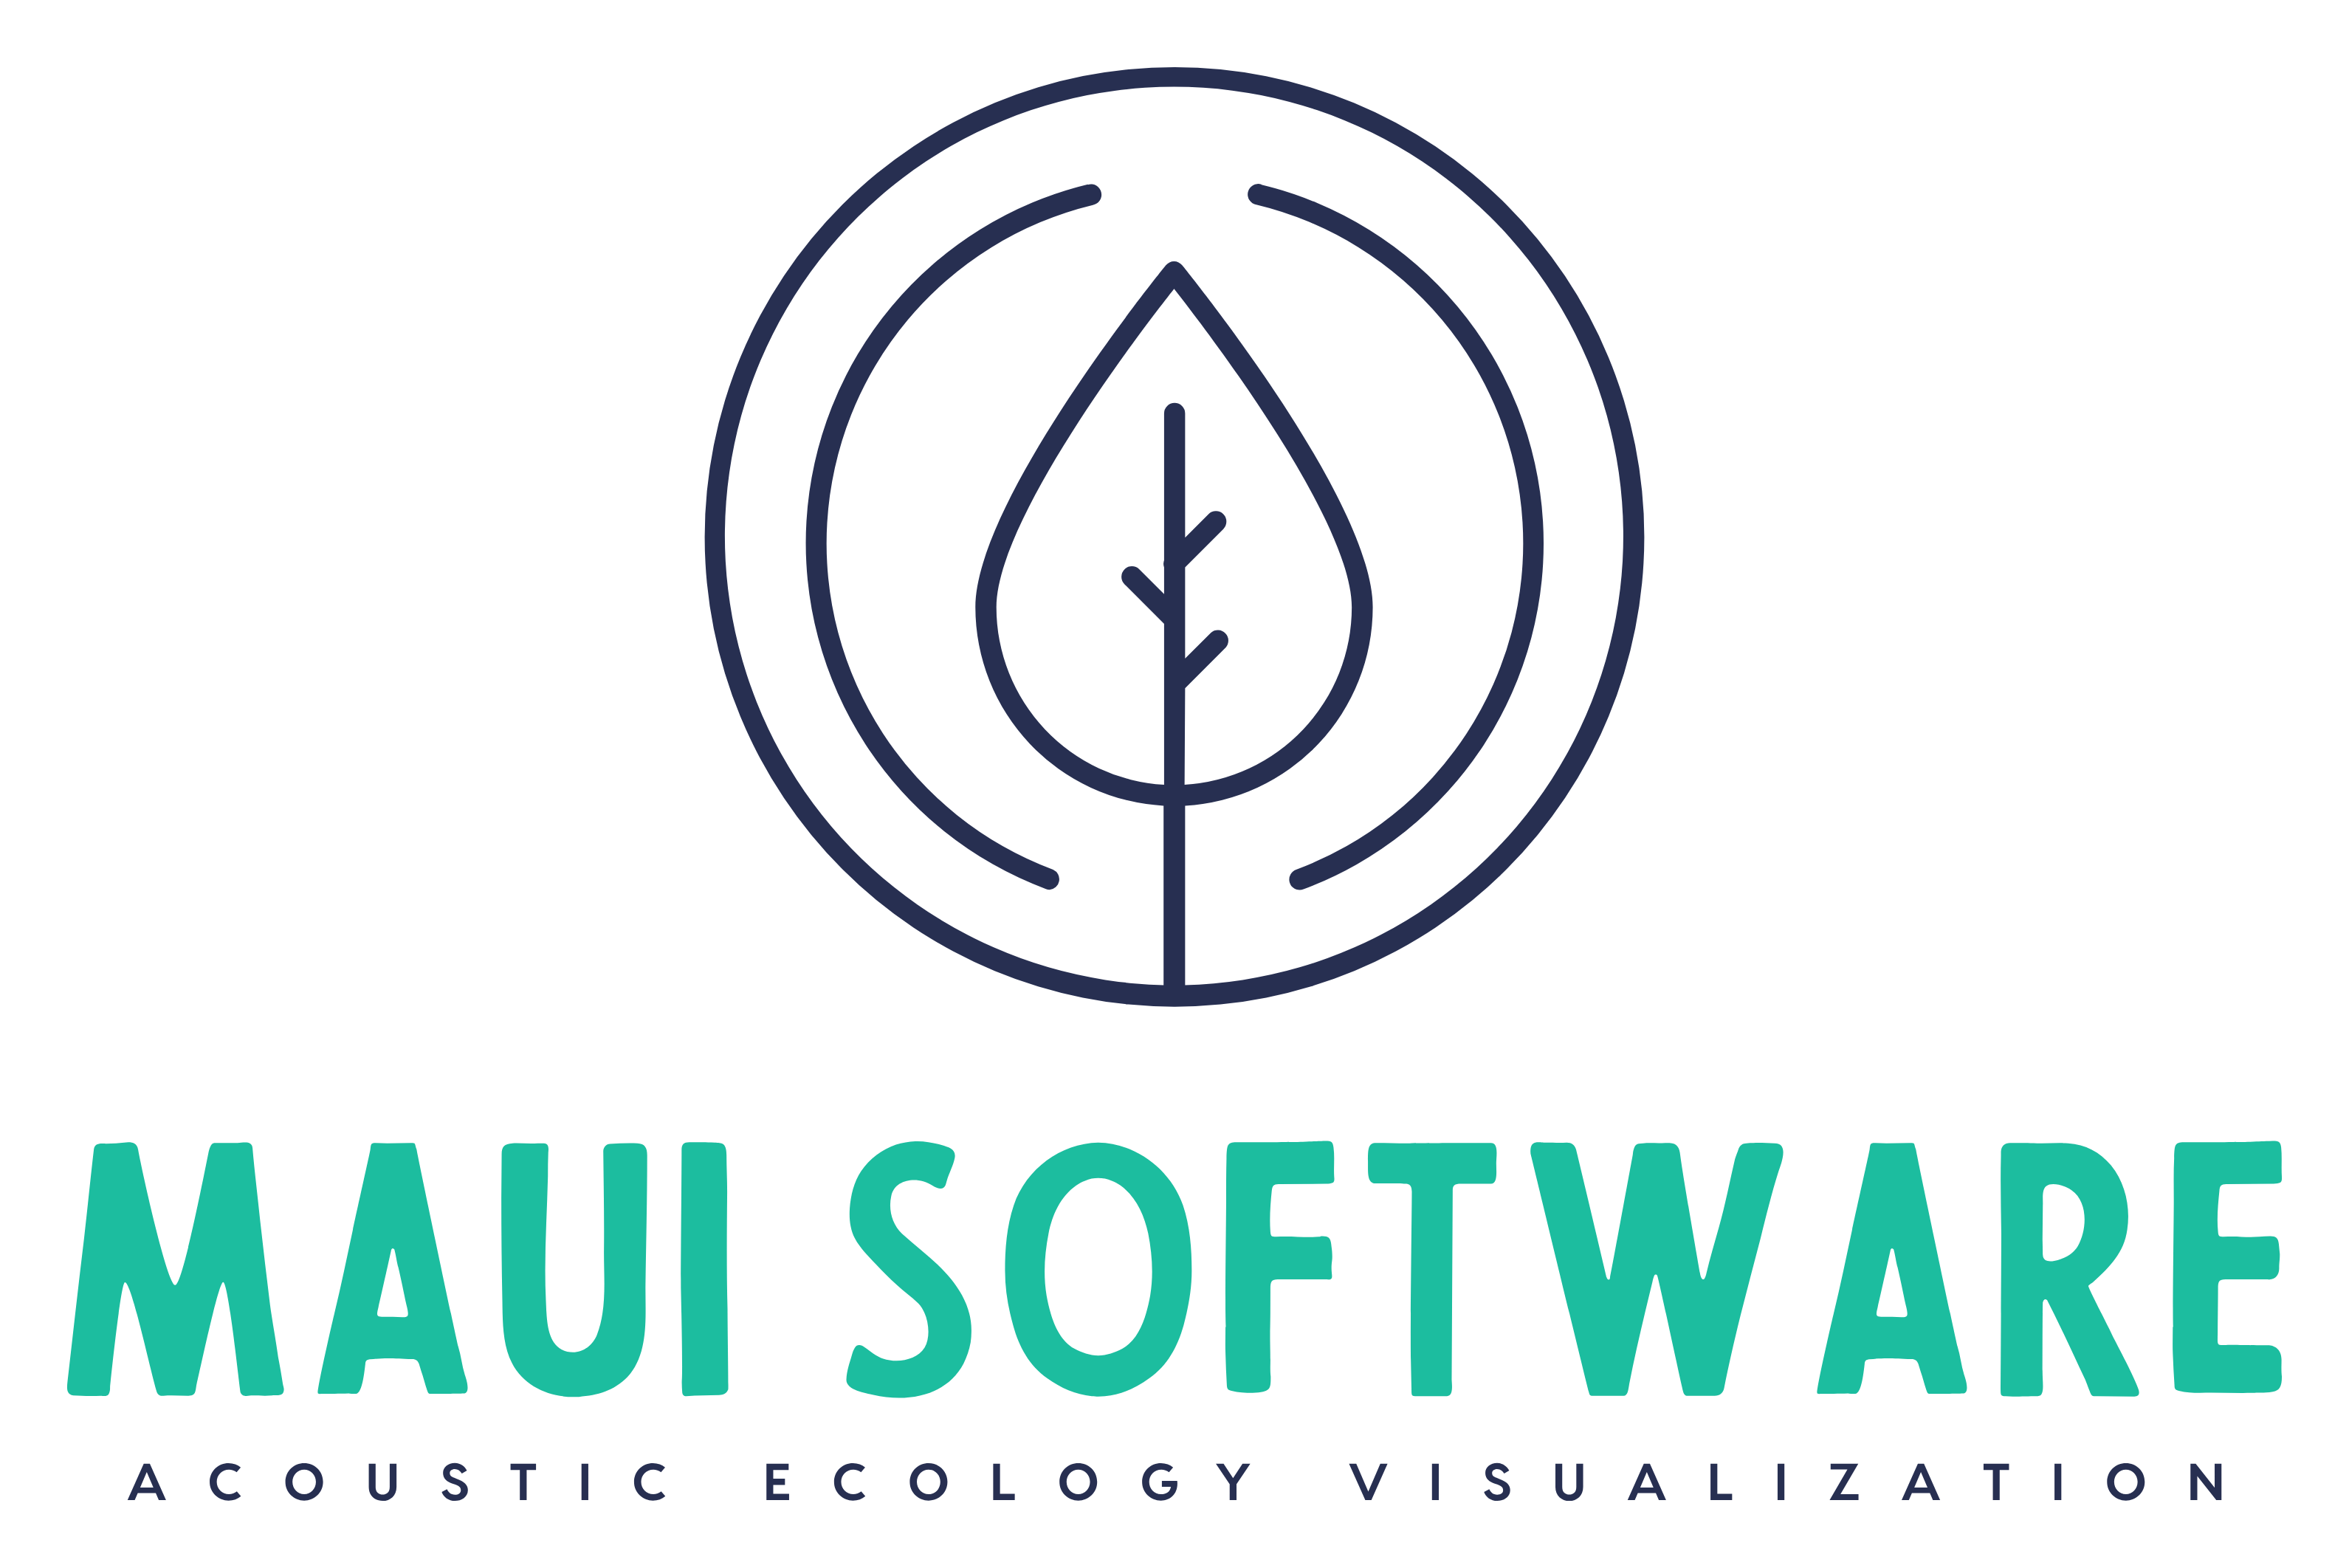

# Welcome to Maui!
## Examples series - Spectrograms

In this example, you'll see how to create spectrograms and false color spectrograms with Maui.

If you have any questions or encounter any issues, please let us know through the [project's GitHub discussions](https://github.com/maui-software/maui-software/discussions)!



# 1. Import Maui

## 1.1. Installation

Maui is available on PyPi and can be installed using pip with the following command. One important detail is that Maui is specifically designed for use in coding interfaces like Colab and Jupyter Lab due to its advanced visualization capabilities, leveraging the power of Plotly.



In [ ]:
!pip install maui-software

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.0/366.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.0 MB/s eta 0:00:00
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=13dc0965702f43c2eb28ea7076222f031d6e1693c50ab612548d960ade70141a
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successf

In [ ]:
!pip install pydub

In [ ]:
!pip install scikit-maad scikit-image scikit-learn resampy

## 1.2. Import

Once installed, it's time to import!

Maui consists of several submodules that need to be imported individually. For this tutorial, we are particularly interested in utilizing the IO and EDA modules.

In [ ]:
import os
import datetime
import audioread
from pydub import AudioSegment
import pandas as pd

from maad import sound, util, features

from maui import samples, visualizations, acoustic_indices, files_metadata, io, eda, utils

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen

# 2. Load and prepare dataset

The initial task is to load the data. In this example we will use the Gympie and Woondum National Park dataset, recorded by Queensland University of Technology:

Phillips, Yvonne (2018): Environmental long-duration audio recordings: Gympie and Woondum National Park . Queensland University of Technology. (Sound) https://doi.org/10.4225/09/5a7297ee4b893

We use a subset of 6 months of data. The file name structure is structured as follows:

YYYYMMDDTHHMMSS+1000__site_id.wav

## 2.1. Define file metadata format

In [ ]:
format_file_path = 'woondum_format.yaml'
audio_path = '/mnt/d/gympie_test'

def date_time_func(values):
    values["timestamp_init"] = datetime.datetime.strptime(
                values["date"] + " " + values["time"], "%Y%m%d %H%M%S"
            )
    return values

## 2.2. Load audio dataset

In [ ]:
df = io.get_audio_info(audio_path, 'WOONDUM_FILE_FORMAT', date_time_func=date_time_func, format_file_path=format_file_path, store_duration=True, perc_sample=1)

Exception: The input must be a file or a directory

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
df['time'] = df['timestamp_init'].dt.strftime('%H:%M')
df

In [ ]:
df_filter = df
fig = eda.daily_distribution_analysis(df_filter, 'date', 'site')

## 2.3. Segment audio files

In [ ]:
segmented_df = utils.segment_audio_files(df_filter, 600, './outputs', 'file_path', 'timestamp_init')

In [ ]:
segmented_df['duration'] = (segmented_df['end_time'] - segmented_df['start_time']).dt.total_seconds()
segmented_df

In [ ]:
segmented_df['start_hour'] = pd.to_datetime(segmented_df['start_time'], unit='s').dt.strftime('%H:%M:%S')

# 3. Visualize data

## 3.1. Diel plot

In [ ]:
fig = visualizations.diel_plot(segmented_df, date_col='date', time_col='start_hour', duration_col='duration', time_bin_size=10, color_map_col='site', show_plot= True)